In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amsfonts}"
%config InlineBackend.figure_format = 'retina'

<div class="alert alert-block alert-warning"> A working latex installation is needed to create plot titles. </div>

#### License
This notebook is subject to __CC BY-SA 4.0 Attribution-ShareAlike 4.0 International__. Please see [LICENSE.md](https://github.com/profConradi/Fractals/blob/dfa98cec96426fd32d7caf25f3335db7394a8671/LICENSE.md).

In [2]:
# template of considered maps C->C
def generic_f(r1, theta1, r2, theta2, a, theta_sym, z):
    return (r1*np.exp(1.j*theta1)*1/z + r2*np.exp(1.j*theta2)*np.conj(z) + a)*np.exp(1.j*theta_sym)

def get_title(parameters):
    """
        Starting from IFS parameters, it generates latex title
        
        It returns the latex title for the picture.
    """
    n_ifs = len(parameters)
    list_of_params = [str(np.round(x,2)).replace("j","i") for x in parameters[0]]
    list_of_params[4]= list_of_params[4].replace("(","")
    list_of_params[4]= list_of_params[4].replace(")","")
    list_of_params[-1] = r"2 \pi i n /%s"%n_ifs
    list_of_params.append(", ".join([str(i) for i in range(0,n_ifs)]))
    eq = r"$z\rightarrow \left(%s \cdot e^{%s i} \cdot \frac{1}{z} + %s \cdot e^{%s i} \cdot \overline{z} + %s\right) \cdot e^{%s} \quad n=%s \quad z \in \mathbb{C}$" %tuple(list_of_params)
    eq = eq.replace("+ -", "-")
    return eq

In [3]:
#function parameters
n_ifs = 3
r1 = -0.54
theta1 = 5.91
r2 = -0.54
theta2 = 3.50
a = 1.71 - 0.67j

parameters = [(r1, theta1, r2, theta2, a, (k*2*np.pi/n_ifs)) for k in range(0, n_ifs)]
ifs = [partial(generic_f, *tupl) for tupl in parameters]

In [4]:
n_points = 3000000
points = np.zeros(n_points, dtype=np.complex64)
points[0] = 0.5+0.5j
for i in range(1, n_points):
    f = np.random.randint(0,n_ifs)
    points[i]=ifs[f](points[i-1])

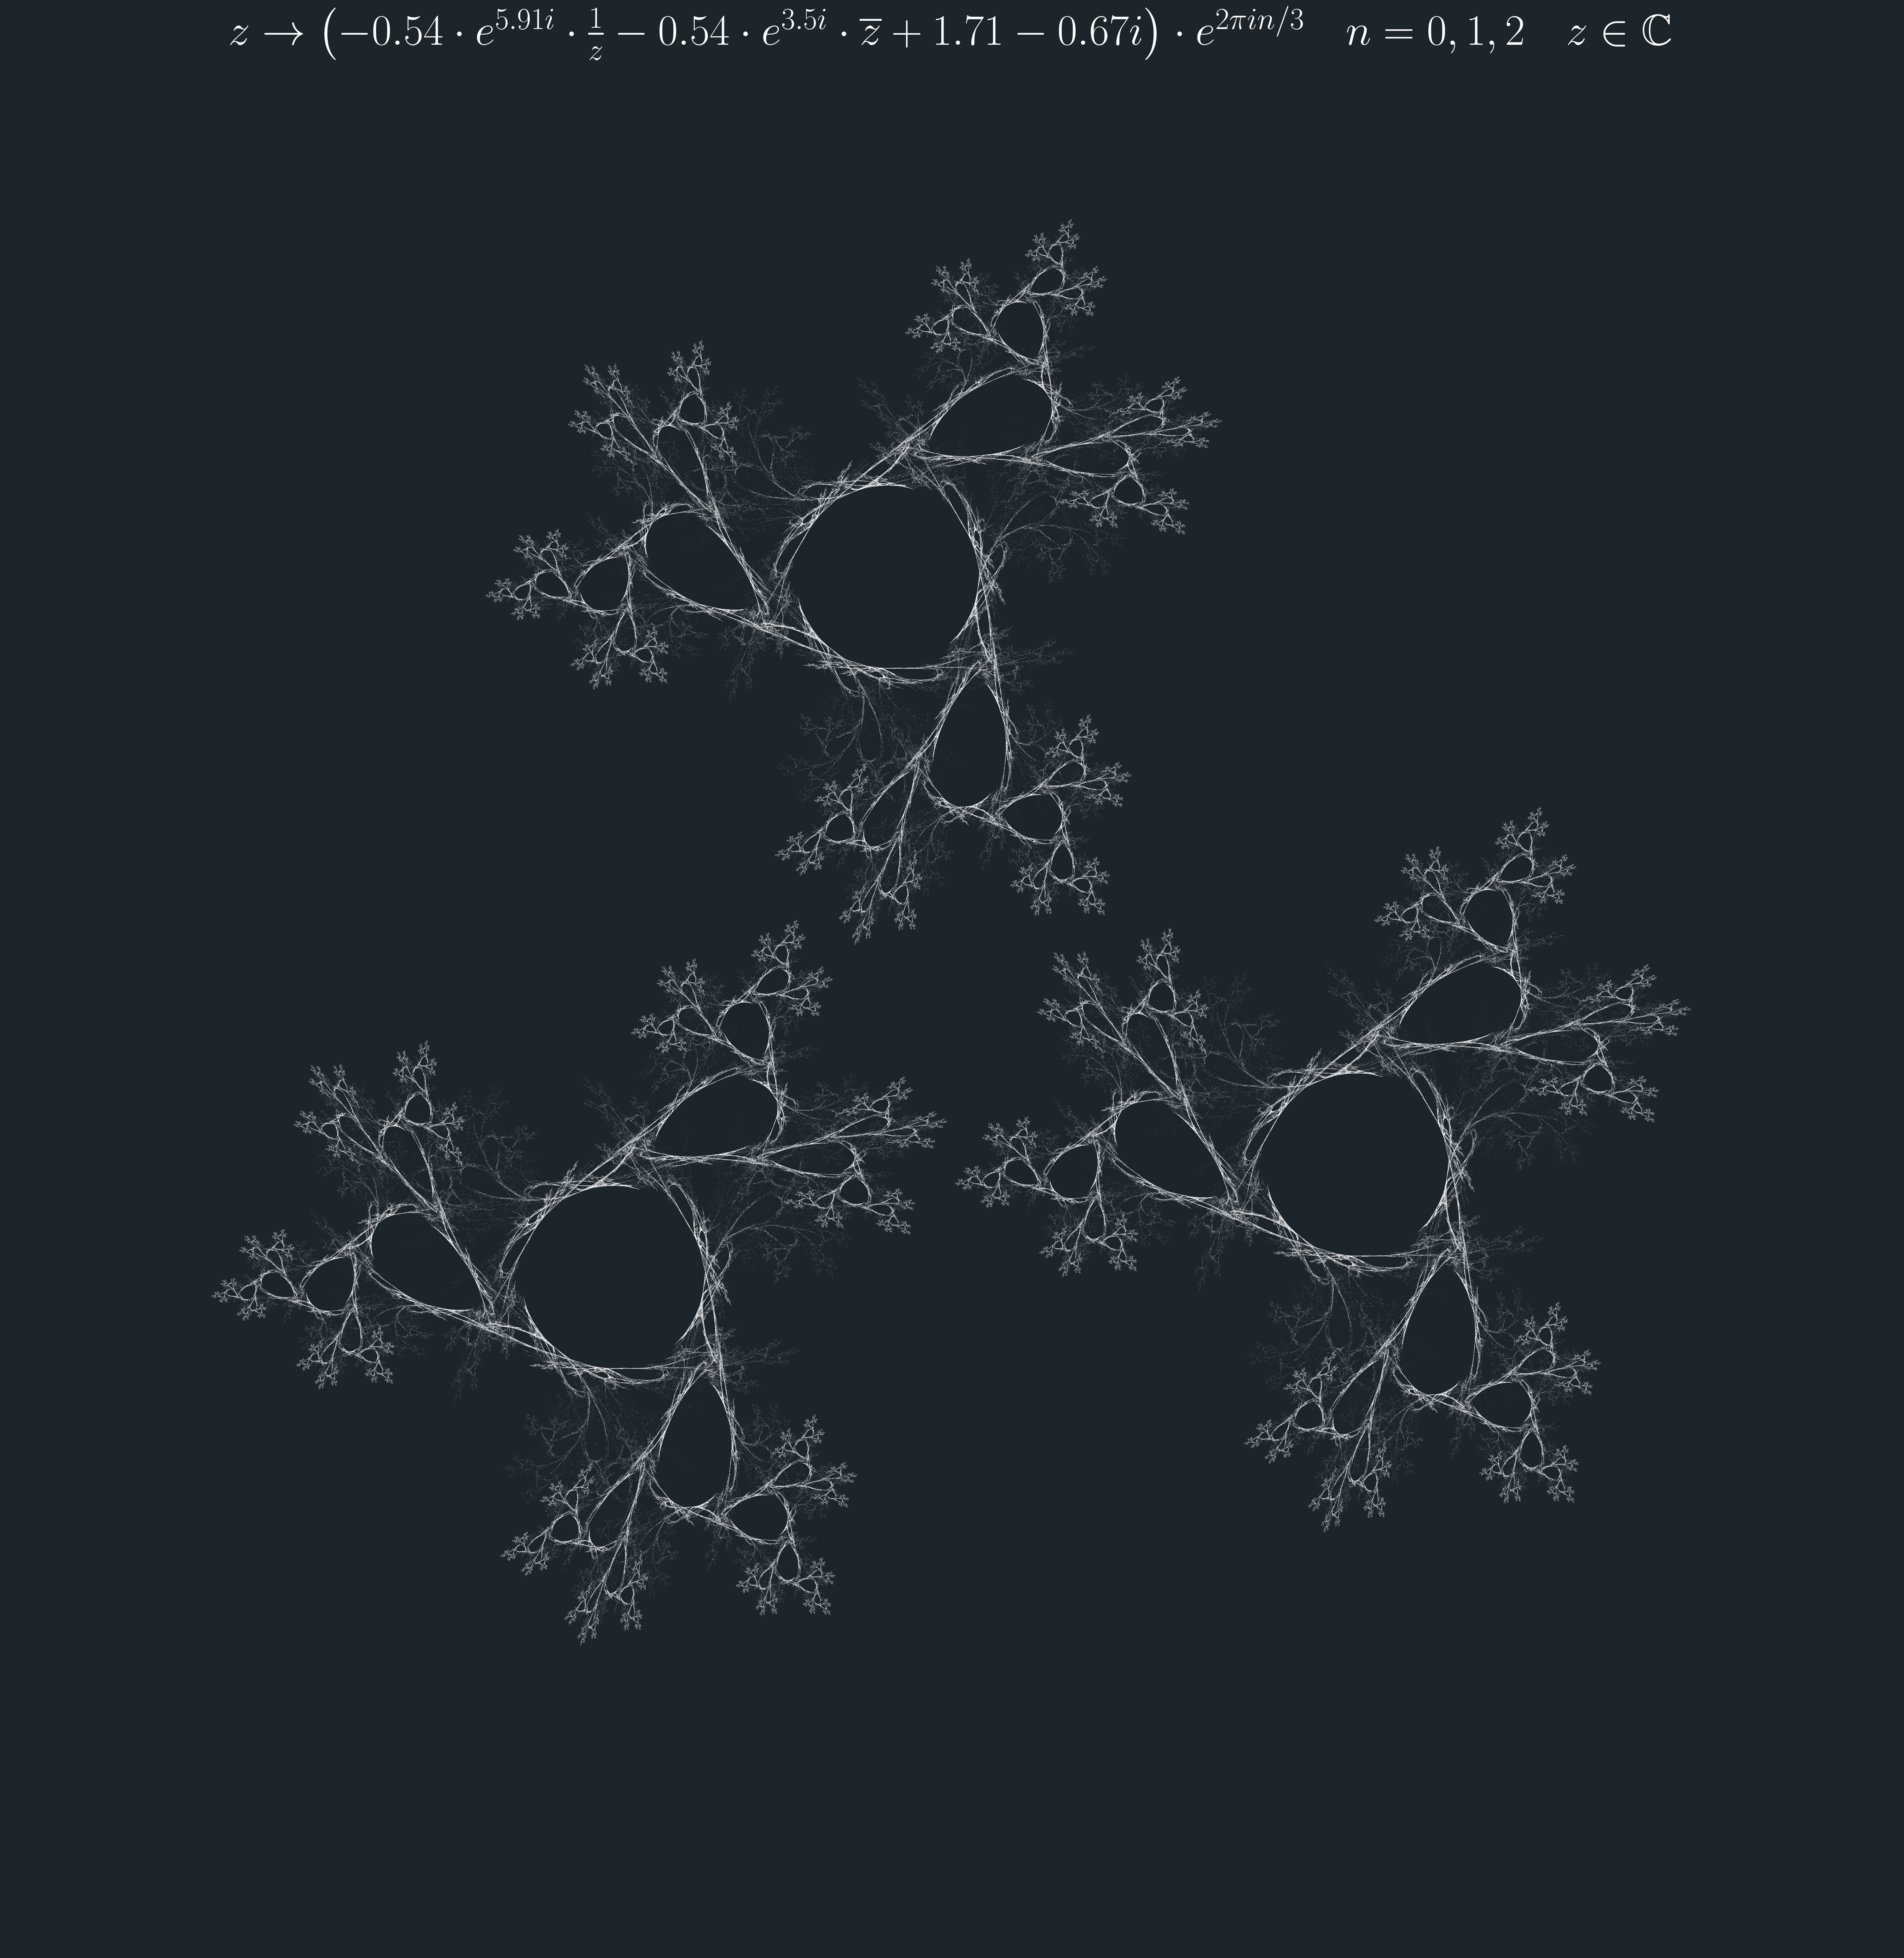

In [5]:
fig,ax = plt.subplots(figsize=(30,30))
fig.set_facecolor("#1d252b")
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
for spine in ['top', 'right','left','bottom']:
    ax.spines[spine].set_visible(False)
ax.scatter(np.real(points), np.imag(points), c="#fbfcfc", s=0.03, linewidths= 0.0001, alpha=1.)
ax.set_axis_off()
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title(f" {get_title(parameters)} ", fontsize=50, color="#fbfcfc")
plt.show()
plt.close()

In [6]:
# template of considered maps C->C
def generic_f(r1, theta1, r2, theta2, a, theta_sym, z):
        return 1/(r1*np.exp(1.j*theta1)*z + r2*np.exp(1.j*theta2)*1/np.conj(z) + a)*np.exp(1.j*theta_sym)



def get_title_inv(parameters):
    """
        Starting from IFS parameters, it generates latex title
        
        It returns the latex title for the picture.
    """
    n_ifs = len(parameters)
    list_of_params = [str(np.round(x,2)).replace("j","i") for x in parameters[0]]
    list_of_params[4]= list_of_params[4].replace("(","")
    list_of_params[4]= list_of_params[4].replace(")","")
    list_of_params[-1] = r"2 \pi i n /%s"%n_ifs
    list_of_params.append(", ".join([str(i) for i in range(0,n_ifs)]))
    eq = r"$z\rightarrow \frac{1}{%s \cdot e^{%s i} \cdot \frac{1}{z} + %s \cdot e^{%s i} \cdot \overline{z} + %s} \cdot e^{%s} \quad n=%s \quad z \in \mathbb{C}$" %tuple(list_of_params)
    eq = eq.replace("+ -", "-")
    return eq

In [7]:
#function parameters
n_ifs = 2
r1 = -0.05
theta1 = 3.07
r2 = 0.68
theta2 = 0.34
a = 1.31 + 1.88j

parameters = [(r1, theta1, r2, theta2, a, (k*2*np.pi/n_ifs)) for k in range(0, n_ifs)]
ifs = [partial(generic_f, *tupl) for tupl in parameters]

In [8]:
n_points = 3000000
points = np.zeros(n_points, dtype=np.complex64)
points[0] = 0.5+0.5j
for i in range(1, n_points):
    f = np.random.randint(0,n_ifs)
    points[i]=ifs[f](points[i-1])

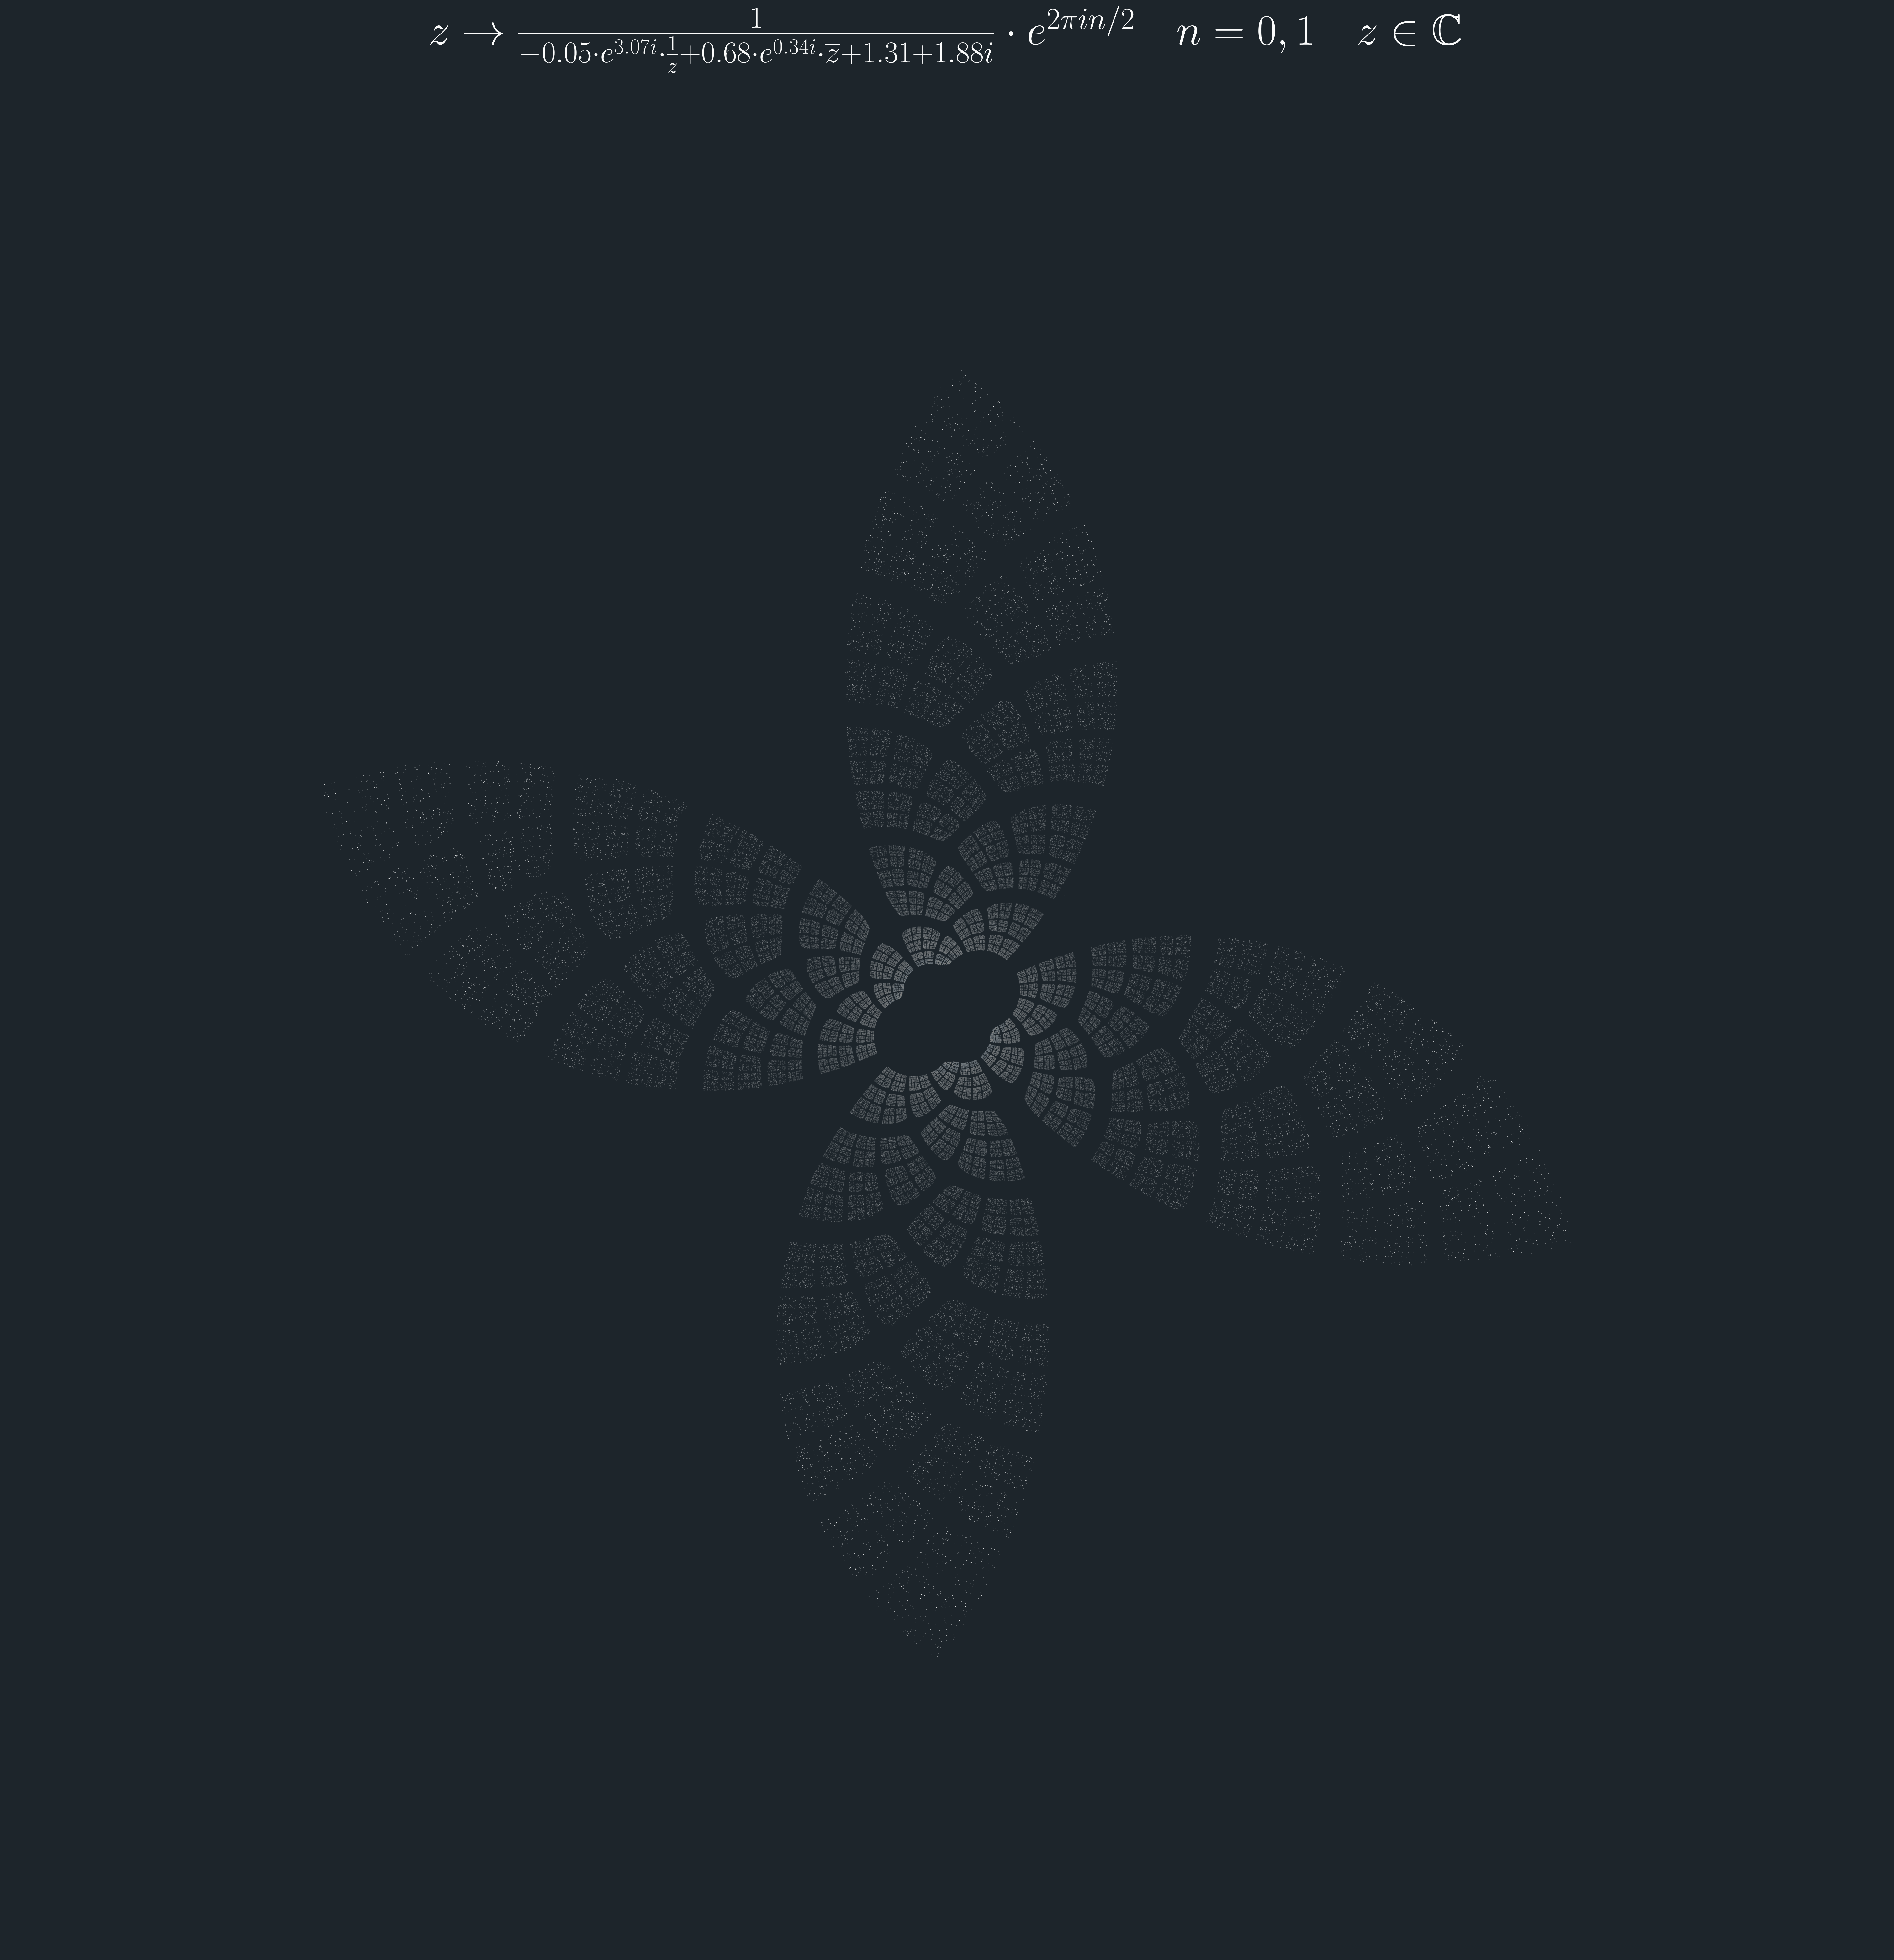

In [10]:
fig,ax = plt.subplots(figsize=(30,30))
fig.set_facecolor("#1d252b")
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
for spine in ['top', 'right','left','bottom']:
    ax.spines[spine].set_visible(False)
ax.scatter(np.real(points), np.imag(points), c="#fbfcfc", s=0.03*np.abs(points)**2, linewidths= 0.0001, alpha=1.)
ax.set_axis_off()
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title(f" {get_title_inv(parameters)} ", fontsize=50, color="#fbfcfc")
plt.show()
plt.close()